In [2]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS



import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yonastadesse/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv("../data/economic_clean_data.csv")

In [5]:
df.head()

,Unnamed: 0,created_at,source,original_text,clean_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,38,Fri Apr 22 22:17:05 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @NorthstarCharts: The 10-year yield is tell...,The 10-year yield is telling us that there's a...,0.16,0.540000,en,0.0,43.0,davideiacovozzi,18,55,NaN,"[{'text': 'gold', 'indices': [116, 121]}, {'te...",NorthstarCharts,NaN
1,39,Fri Apr 22 13:44:53 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @MichaelAArouet: German 10y mortgage rate w...,"German 10y mortgage rate went from 0,8% to 2,5...",0.15,0.175000,en,0.0,32.0,davideiacovozzi,18,55,NaN,[],MichaelAArouet,NaN
2,41,Fri Apr 22 06:10:34 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @goldseek: When? https://t.co/kO2FfHKaZg,When? https://t.co/kO2FfHKaZg,0.00,0.000000,en,0.0,26.0,davideiacovozzi,18,55,False,[],goldseek,NaN
3,42,Thu Apr 21 17:22:09 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @charliebilello: The 30-year mortgage rate ...,The 30-year mortgage rate in the US rises to 5...,0.00,0.066667,en,0.0,213.0,davideiacovozzi,18,55,NaN,[],charliebilello,NaN
4,43,Thu Apr 21 10:32:26 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @biancoresearch: Rates rise until something...,Rates rise until something breaks … is anythin...,-0.40,0.400000,en,0.0,417.0,davideiacovozzi,18,55,False,[],biancoresearch,NaN


In [6]:
Clean_Tweet = df[['original_text','polarity', 'subjectivity']]

In [7]:

def text_category (p):
    if p > 0:
        return 'positive'
    if p < 0:
        return 'negative'
    else:
        return 'neutral'

In [8]:
score = pd.Series([text_category(row_value) for row_value in Clean_Tweet['polarity']])

Clean_Tweet = pd.concat([Clean_Tweet, score.rename("score")], axis=1)

Clean_Tweet.head()


,original_text,polarity,subjectivity,score
0,RT @NorthstarCharts: The 10-year yield is tell...,0.16,0.540000,positive
1,RT @MichaelAArouet: German 10y mortgage rate w...,0.15,0.175000,positive
2,RT @goldseek: When? https://t.co/kO2FfHKaZg,0.00,0.000000,neutral
3,RT @charliebilello: The 30-year mortgage rate ...,0.00,0.066667,neutral
4,RT @biancoresearch: Rates rise until something...,-0.40,0.400000,negative


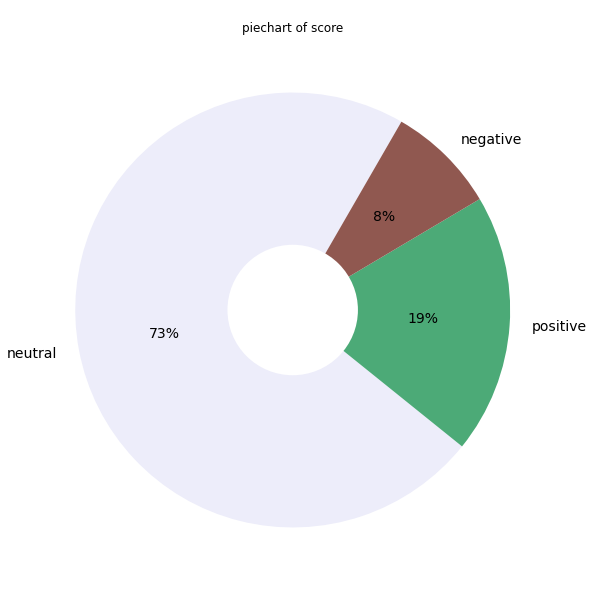

In [9]:
fig, ax  = plt.subplots(figsize=(20, 10))
labels = ['neutral', 'positive', 'negative']
neutral_count = len(Clean_Tweet[Clean_Tweet['score'] == "neutral"])
positive_count = len(Clean_Tweet[Clean_Tweet['score'] == "positive"])
negative_count = len(Clean_Tweet[Clean_Tweet['score'] == "negative"])
sizes = [neutral_count, positive_count, negative_count]
ax.pie(sizes,startangle=60, labels=labels,autopct='%1.0f%%', colors=["#ededfa","#4caa77","#905850"],textprops={'fontsize': 14})
ax.add_artist(plt.Circle((0,0),0.3,fc='white'))
ax.set_title('\npiechart of score') 
fig.show()


In [10]:
scoremap = pd.Series([1 if row_value == 'positive' else 0 for row_value in Clean_Tweet['score']])

In [11]:

Clean_Tweet = pd.concat([Clean_Tweet, scoremap.rename("scoremap")], axis=1)
Clean_Tweet['scoremap'] = scoremap
Clean_Tweet.reset_index()


,index,original_text,polarity,subjectivity,score,scoremap
0,0,RT @NorthstarCharts: The 10-year yield is tell...,0.16,0.540000,positive,1
1,1,RT @MichaelAArouet: German 10y mortgage rate w...,0.15,0.175000,positive,1
2,2,RT @goldseek: When? https://t.co/kO2FfHKaZg,0.00,0.000000,neutral,0
3,3,RT @charliebilello: The 30-year mortgage rate ...,0.00,0.066667,neutral,0
4,4,RT @biancoresearch: Rates rise until something...,-0.40,0.400000,negative,0
...,...,...,...,...,...,...
16460,16460,RT @CHARANJITCHANNI: Best wishes &amp; heartfe...,0.50,0.729630,positive,1
16461,16461,RT @pbhushan1: Thank you @BajpayeeManoj for th...,0.85,1.000000,positive,1
16462,16462,RT @s_shreyatweets: Agree ?👇 https://t.co/R54Z...,0.00,0.000000,neutral,0
16463,16463,RT @tejjINC: 1. Peace Yatra by Late Sunil Dutt...,-0.30,0.600000,negative,0


In [12]:
data = Clean_Tweet[['original_text','score']]
data

,original_text,score
0,RT @NorthstarCharts: The 10-year yield is tell...,positive
1,RT @MichaelAArouet: German 10y mortgage rate w...,positive
2,RT @goldseek: When? https://t.co/kO2FfHKaZg,neutral
3,RT @charliebilello: The 30-year mortgage rate ...,neutral
4,RT @biancoresearch: Rates rise until something...,negative
...,...,...
16460,RT @CHARANJITCHANNI: Best wishes &amp; heartfe...,positive
16461,RT @pbhushan1: Thank you @BajpayeeManoj for th...,positive
16462,RT @s_shreyatweets: Agree ?👇 https://t.co/R54Z...,neutral
16463,RT @tejjINC: 1. Peace Yatra by Late Sunil Dutt...,negative


In [13]:
train, test = train_test_split(data,test_size = 0.2, shuffle=True, stratify=data.score,random_state=42)

In [14]:
train_pos = train[ train['score'] == 'positive']
train_pos = train_pos['original_text']
train_neg = train[ train['score'] == 'negative']
train_neg = train_neg['original_text']
train_neutral = train[ train['score'] == 'neutral']
train_neutral = train_neutral['original_text']


In [15]:

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

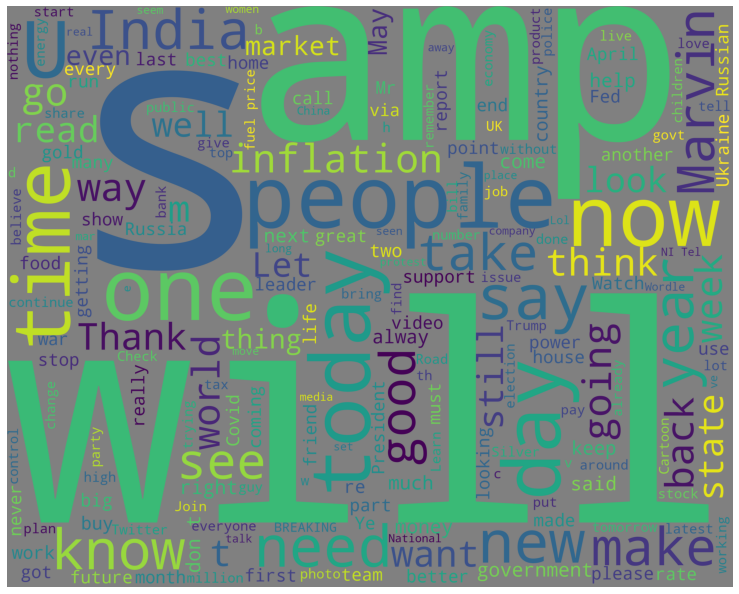

In [16]:
wordcloud_draw(train_neutral,'grey')

Positive words


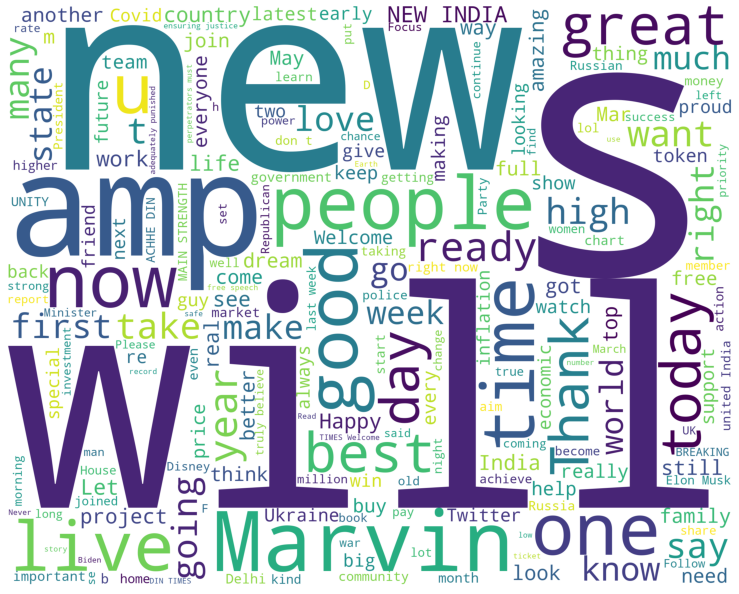

In [17]:
print("Positive words")
wordcloud_draw(train_pos,'white')

Negative words


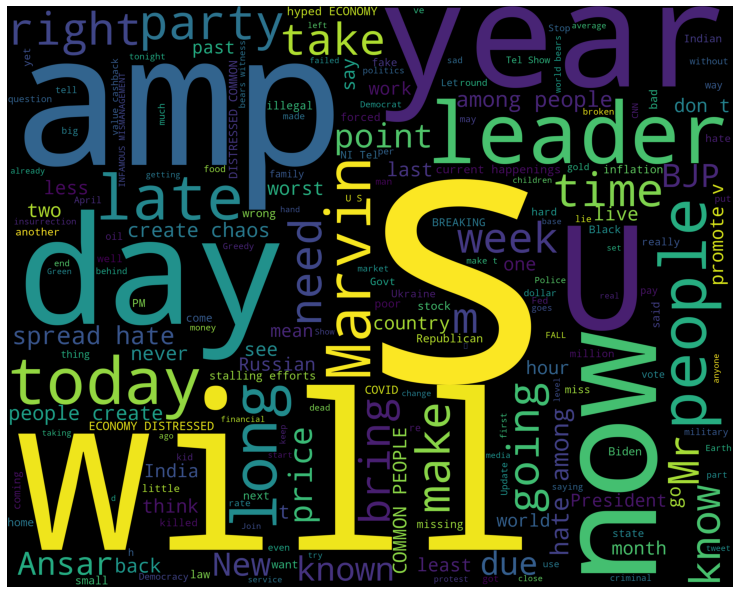

In [18]:
print("Negative words")
wordcloud_draw(train_neg)

In [19]:

tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.original_text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.score))

test_pos = test[ test['score'] == 'positive']
test_pos = test_pos['original_text']
test_neg = test[ test['score'] == 'negative']
test_neg = test_neg['original_text']
test_neutral = test[ test['score'] == 'neutral']
test_neutral = test_neutral['original_text']

In [20]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, score) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

In [21]:
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [ ]:
neg_count = 0
pos_count = 0
neutral_countt=0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'negative'): 
        neg_count = neg_count + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'positive'): 
        pos_count = pos_count + 1
for obj in test_neutral: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'neutral'): 
        neutral_count = neutral_count + 1        
print('Negative: %s/%s '  % (len(test_neg),neg_count))        
print('Positive: %s/%s '  % (len(test_pos),pos_count)) 
print('Neutral: %s/%s '  % (len(test_neutral),neutral_count))

[Negative]: 268/19 
[Positive]: 636/101 
[Neutral]: 2389/2368 
